<a href="https://colab.research.google.com/github/amirarasteh1990/Examples/blob/main/cable_layout_with_edwin_example_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INSTALL ALL REQUIRED PACKAGES**

In [1]:
import importlib
if not importlib.util.find_spec("py_wake"):
  !pip install git+https://gitlab.windenergy.dtu.dk/TOPFARM/PyWake.git
if not importlib.util.find_spec("ed_win"):
  !pip install git+https://gitlab.windenergy.dtu.dk/TOPFARM/edwin.git#egg=ed_win[interarray]
  # fix ortools version
  !pip uninstall ortools -y
  !pip install ortools==9.6.2534

  Cloning https://gitlab.windenergy.dtu.dk/TOPFARM/PyWake.git to /tmp/pip-req-build-qh5aah_5
  Running command git clone --filter=blob:none --quiet https://gitlab.windenergy.dtu.dk/TOPFARM/PyWake.git /tmp/pip-req-build-qh5aah_5
  Resolved https://gitlab.windenergy.dtu.dk/TOPFARM/PyWake.git to commit 18d9a666858a205641c461386f31ae558cb5b155
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 39.8 MB/s eta 0:00:00
  Created wheel for py_wake: filename=py_wake-2.6.9-py3-none-any.whl size=19890101 sha256=6ff91b89a5c9ea9b61dfe6feb0ddf4f4e3fcd4704ea8fc13253f811fc1c061da
  Stored in directory: /tmp/pip-ephem-wheel-cache-8oahkh__/wheels/76/2f/75/c056f102fb42126f415398d5817b64ad9edbe27227039b02b3
Successfully built py_wake
DEPRECATION: git+https://gitlab.windenergy.dtu.dk/TOPFARM/edw



---


**Import Necessary module and functions**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from ed_win.wind_farm_network import WindFarmNetwork



---


**Load Wind Turbine locations from PyWake (Wind Farm Layout Optimization)**

In [3]:
from py_wake.validation.lillgrund import wt_x, wt_y



---


**Cable Layout Optimization with Edwin using default solver**


In [4]:
turbines_pos=np.asarray([wt_x, wt_y]).T
substations_pos = np.asarray([[359470], [6153890]]).T

cables = np.array([[500, 3, 100], [800, 5, 150], [1000, 10, 250]])

wfn = WindFarmNetwork(turbines_pos=turbines_pos, substations_pos=substations_pos, cables=cables)
# Here we use the default format of the inputs (which is passing coordinates directly to the function).
# If we had the data in other formats (graph or yaml file), we could pass them to the function as follows:
# with Graph: wfn = WindFarmNetwork.from_graph(G, cables=cables)
# with Yaml file: wfn = WindFarmNetwork().from_windIO(yaml_path, cables=cables)

G1 = wfn.optimize()
# The output of the optimize() method will be a graph.
# If other output formats (e.g. table, yaml file) is preferred, we can define the format as follows:
# For table: T = wfn.optimize(output_format == 'table')
# For Yaml file: Y = wfn.optimize(output_format == 'yaml')

Solving with heuristic(cpew)



can you say what is the default solver based on the output of the optimization?



---

**Plot the optimized layout**

<Axes: >

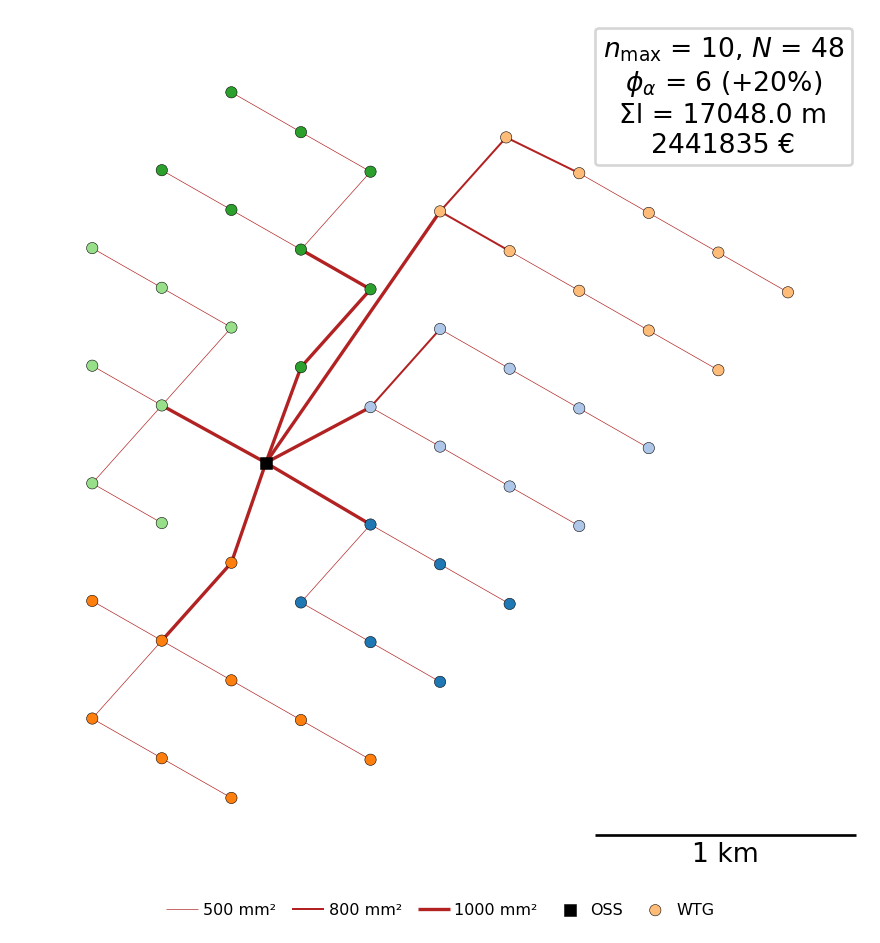

In [5]:
G1.plot()



---


**Change substation positon and re-optimize the layout**

In [ ]:
G2 = wfn.optimize(turbines_pos= np.asarray([x, y]).T)

In [ ]:
G2.plot()



---


**Change substation positon and re-optimize the layout**

In [ ]:
G3 = wfn.optimize(turbines_pos= np.asarray([x, y]).T)

In [ ]:
G3.plot()



---


**Cable Layout Optimization with Edwin using Ortools as the solver**


In [13]:
from ed_win.wind_farm_network import InterArrayDriver
# choose the driver (interarray with settings)
interarray_setting = {
    'solver_name': 'ortools(cp-sat)',
    # choose between cplex, cbc, ortools(cp-sat), heuristic(cpew), heuristic(obew) (to be added: guroubi, highs, scip)
    'gap': 0.05,  # gab between best possible layout and the incumbent
    'timelimit': 2000,  # seconds
    'other_settings': {'tee': True, 'gateXings_constraint': True}
    }
wfn = WindFarmNetwork(turbines_pos=turbines_pos, substations_pos=substations_pos, cables=cables, drivers=[InterArrayDriver(**interarray_setting)])
G2 = wfn.optimize()

Solving with ortools(cp-sat)


Starting CP-SAT solver v9.6.2534
Parameters: max_time_in_seconds: 2000 log_search_progress: true relative_gap_limit: 0.05
Setting number of workers to 2

Initial optimization model '': (model_fingerprint: 0x2eed74475d1ba210)
#Variables: 508 (#bools:254 in floating point objective)
  - 254 Booleans in [0,1]
  - 206 in [-9,9]
  - 48 in [0,10]
#kAtMostOne: 957 (#literals: 1902)
#kLinear1: 508 (#enforced: 508)
#kLinearN: 99 (#terms: 1270)

Starting presolve at 0.00s
[Scaling] Floating point objective has 254 terms with magnitude in [306.317, 3148.2] average = 741.018
[Scaling] Objective coefficient relative error: 2.83292e-09
[Scaling] Objective worst-case absolute error: 6.78293e-05
[Scaling] Objective scaling factor: 524288
[ExtractEncodingFromLinear] #potential_supersets=909 #potential_subsets=0 #at_most_one_encodings=0 #exactly_one_encodings=0 #unique_terms=0 #multiple_terms=0 #literals=0 time=5.0754e-05s
[Symmetry] Graph for symmetry has 1879 nodes and 4

<Axes: >

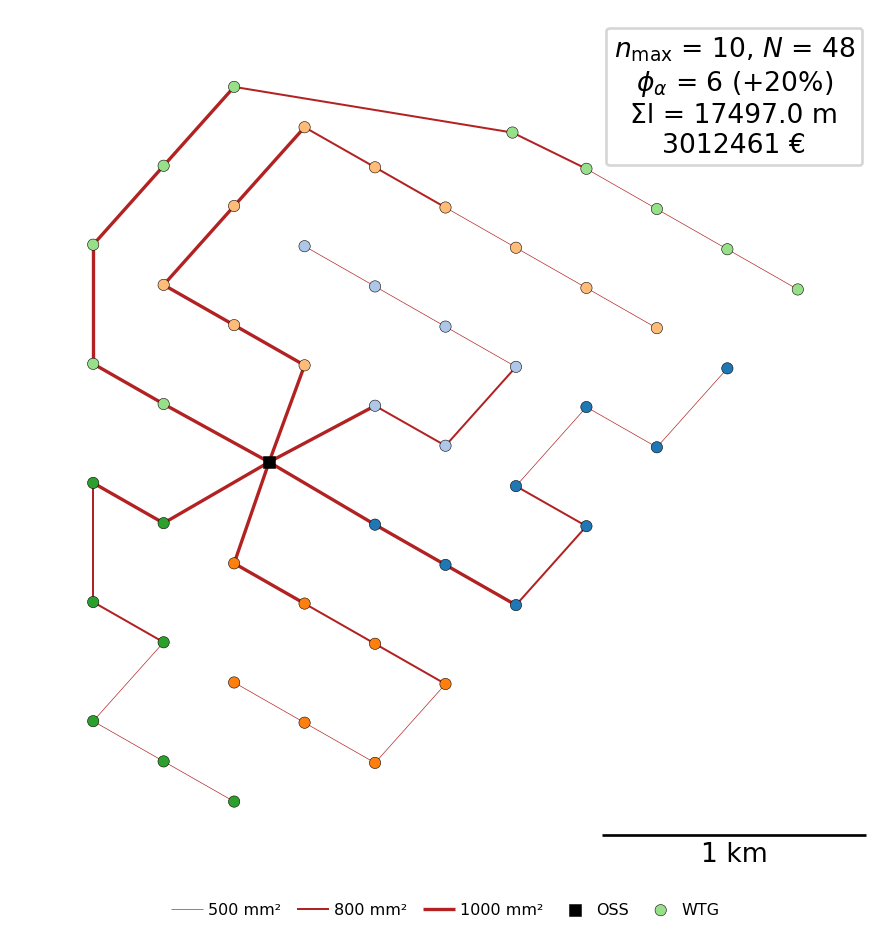

In [7]:
# Plot the optimized layout with ortools
G2.plot()

End of the exercise


---

